In [1]:
%pip install scikit-learn numpy matplotlib scipy


You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier



In [2]:
import utils.mnist_reader as mnist_reader
X_train, y_train = mnist_reader.load_mnist('data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('data/fashion', kind='t10k')

In [3]:
def scale_data(X_tr: np.array, X_te: np.array) -> tuple[np.array, np.array]:
    scaler = StandardScaler()
    scaler.fit(X_tr)
    
    X_tr_scaled = scaler.transform(X_tr)
    X_te_scaled = scaler.transform(X_te)
    
    return X_tr_scaled, X_te_scaled

X_tr_scaled, X_te_scaled = scale_data(X_train, X_test)

### Experiment: Error as a function of training data size

In [4]:
def errors_for_train_sizes_mlp(X_tr: np.array, y_tr: np.array, X_te: np.array, y_te: np.array, train_sizes: list[int]) -> tuple[list, list, list, list]:
    tr_err_mlp = []
    te_err_mlp = []

    for size in train_sizes:
        mlp = MLPClassifier(hidden_layer_sizes=(64,), activation='relu', solver='sgd', batch_size=256, learning_rate='constant', learning_rate_init=0.001)
        print(f"Training MLP on size {size}...")
        mlp.fit(X_tr[:size], y_tr[:size])
        print("Making predictions and calculating errors...")
        tr_error = 1 - mlp.score(X_tr[:size], y_tr[:size])
        te_error = 1 - mlp.score(X_te, y_te)
        
        print(f"Training error: {tr_error}. Testing error: {te_error}")
        tr_err_mlp.append(tr_error)
        te_err_mlp.append(te_error)
    
    return tr_err_mlp, te_err_mlp 

In [5]:
def plot_errors_for_train_sizes_mlp_lr(tr_err_mlp: list, te_err_mlp: list, train_sizes: list[int]) -> None:
    plt.semilogx(train_sizes, tr_err_mlp, label='MLP Training error')
    plt.semilogx(train_sizes, te_err_mlp, label='MLP Testing error')

    plt.xlabel('Num. Training Data Points')
    plt.ylabel('Error Rate')

    plt.legend();

Training MLP on size 50...
Making predictions and calculating errors...
Training error: 0.0. Testing error: 0.40159999999999996
Training MLP on size 500...


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:609: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Making predictions and calculating errors...
Training error: 0.04200000000000004. Testing error: 0.24060000000000004
Training MLP on size 2000...


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Making predictions and calculating errors...
Training error: 0.04800000000000004. Testing error: 0.1866
Training MLP on size 5000...


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Making predictions and calculating errors...
Training error: 0.05620000000000003. Testing error: 0.16569999999999996
Training MLP on size 10000...


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Making predictions and calculating errors...
Training error: 0.05520000000000003. Testing error: 0.1512
Training MLP on size 20000...


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Making predictions and calculating errors...
Training error: 0.059250000000000025. Testing error: 0.138
Training MLP on size 40000...


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Making predictions and calculating errors...
Training error: 0.057825000000000015. Testing error: 0.12880000000000003
Training MLP on size 60000...


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Making predictions and calculating errors...
Training error: 0.05661666666666665. Testing error: 0.11639999999999995


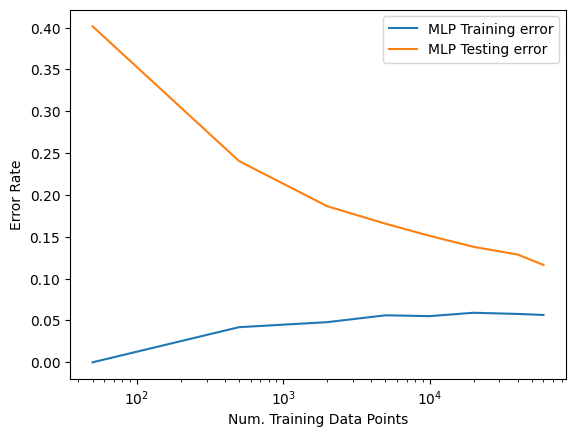

In [6]:
train_sizes = [50, 500, 2000, 5000, 10000, 20000, 40000, 60000]
tr_err_mlp, te_err_mlp = errors_for_train_sizes_mlp(X_tr_scaled, y_train, X_te_scaled, y_test, train_sizes)
plot_errors_for_train_sizes_mlp_lr(tr_err_mlp, te_err_mlp, train_sizes)

### Experiment: Error as a function of learning rate

In [12]:
# Validation set of 10,000 images
X_val_10k = X_tr_scaled[:10000]
y_val_10k = y_train[:10000]

# Training set of 70,000 images
X_tr_50k = X_tr_scaled[10000:]
y_tr_50k = y_train[10000:]

In [24]:
def errors_for_learning_rates_mlp(X_tr: np.array, y_tr: np.array, learning_rates: list[float]) -> list[list]:
    err_curves = [] # append loss_curve_ from each MLP model to this list
    for lr in learning_rates:
        mlp = MLPClassifier(hidden_layer_sizes=(64,), activation='relu', solver='sgd', batch_size=256, n_iter_no_change=100, max_iter=300, learning_rate='constant', learning_rate_init=lr)
        mlp.fit(X_tr, y_tr)
        err_curves.append(mlp.loss_curve_)
    return err_curves 

In [25]:
def plot_errors_for_learning_rates_mlp(err_curves: list[list], learning_rates: list[float]) -> None:
    for i, curve in enumerate(err_curves):
        print(len(curve))
        plt.plot(np.linspace(0, 300, len(curve)), curve, label=f"α=({learning_rates[i]})")
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend();

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iteration

300
300
300
300
264


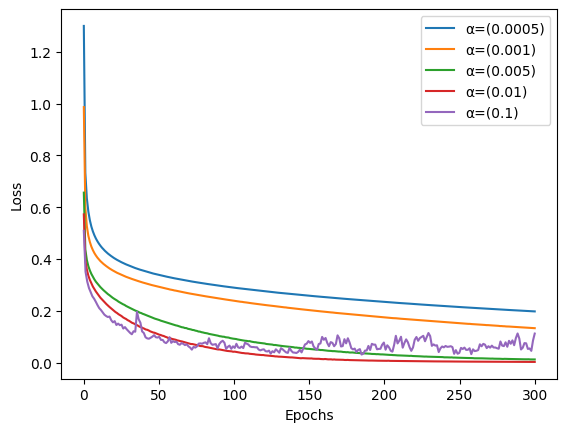

In [26]:
learning_rates = [0.0005, 0.001, 0.005, 0.01, 0.1]
err_curves = errors_for_learning_rates_mlp(X_tr_50k, y_tr_50k, learning_rates)
plot_errors_for_learning_rates_mlp(err_curves, learning_rates)

### Hyperparameter Tuning

In [7]:
# Define hyperparameter grid
from sklearn.model_selection import GridSearchCV

param_grid = {
    'hidden_layer_sizes': [(128,), (256,), (512,)],
    'activation': ['relu'],
    'solver': ['sgd'],
    'learning_rate': ['adaptive'],
    'learning_rate_init': [0.01],
    'max_iter': [200, 400, 600],
    'n_iter_no_change': [100],
    'batch_size': [256, 400, 600],
    'alpha': [0.0001, 0.001, 0.01]  # regularization strength (L2 penalty)
}

# Create base MLPClassifier
base_mlp = MLPClassifier(
    # n_iter_no_change=100,  # early stopping patience
    random_state=1234        # for reproducibility
)

# Create GridSearchCV object
grid_search = GridSearchCV(
    estimator=base_mlp,
    param_grid=param_grid,
    cv=5,                  # 3-fold cross validation
    scoring='accuracy',    # metric to optimize
    n_jobs=-1,            # use all available cores
    verbose=2             # show progress
)



In [8]:
# Fit grid search (commented out since we'll run it in next cell)
grid_search.fit(X_tr_scaled, y_train)

# Print best parameters and score (commented out since we'll run it after fitting)
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=256, hidden_layer_sizes=(128,), learning_rate=adaptive, learning_rate_init=0.01, max_iter=200, n_iter_no_change=100, solver=sgd; total time= 8.9min


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=256, hidden_layer_sizes=(128,), learning_rate=adaptive, learning_rate_init=0.01, max_iter=200, n_iter_no_change=100, solver=sgd; total time= 9.5min
[CV] END activation=relu, alpha=0.0001, batch_size=256, hidden_layer_sizes=(128,), learning_rate=adaptive, learning_rate_init=0.01, max_iter=200, n_iter_no_change=100, solver=sgd; total time= 9.5min


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=256, hidden_layer_sizes=(128,), learning_rate=adaptive, learning_rate_init=0.01, max_iter=200, n_iter_no_change=100, solver=sgd; total time= 9.8min


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=256, hidden_layer_sizes=(128,), learning_rate=adaptive, learning_rate_init=0.01, max_iter=200, n_iter_no_change=100, solver=sgd; total time=10.9min


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=256, hidden_layer_sizes=(128,), learning_rate=adaptive, learning_rate_init=0.01, max_iter=400, n_iter_no_change=100, solver=sgd; total time=17.1min


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=256, hidden_layer_sizes=(128,), learning_rate=adaptive, learning_rate_init=0.01, max_iter=400, n_iter_no_change=100, solver=sgd; total time=17.3min


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=256, hidden_layer_sizes=(128,), learning_rate=adaptive, learning_rate_init=0.01, max_iter=400, n_iter_no_change=100, solver=sgd; total time=18.0min


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=256, hidden_layer_sizes=(128,), learning_rate=adaptive, learning_rate_init=0.01, max_iter=400, n_iter_no_change=100, solver=sgd; total time=13.9min


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=256, hidden_layer_sizes=(128,), learning_rate=adaptive, learning_rate_init=0.01, max_iter=400, n_iter_no_change=100, solver=sgd; total time=14.7min


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=256, hidden_layer_sizes=(256,), learning_rate=adaptive, learning_rate_init=0.01, max_iter=200, n_iter_no_change=100, solver=sgd; total time=11.6min


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=256, hidden_layer_sizes=(128,), learning_rate=adaptive, learning_rate_init=0.01, max_iter=600, n_iter_no_change=100, solver=sgd; total time=20.4min


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=256, hidden_layer_sizes=(128,), learning_rate=adaptive, learning_rate_init=0.01, max_iter=600, n_iter_no_change=100, solver=sgd; total time=20.9min


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, batch_size=256, hidden_layer_sizes=(128,), learning_rate=adaptive, learning_rate_init=0.01, max_iter=600, n_iter_no_change=100, solver=sgd; total time=22.3min


KeyboardInterrupt: 